In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [4]:
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
data = data[~(data['MEDV'] >= 50.0)]
np.shape(data)

(490, 14)

<AxesSubplot:>

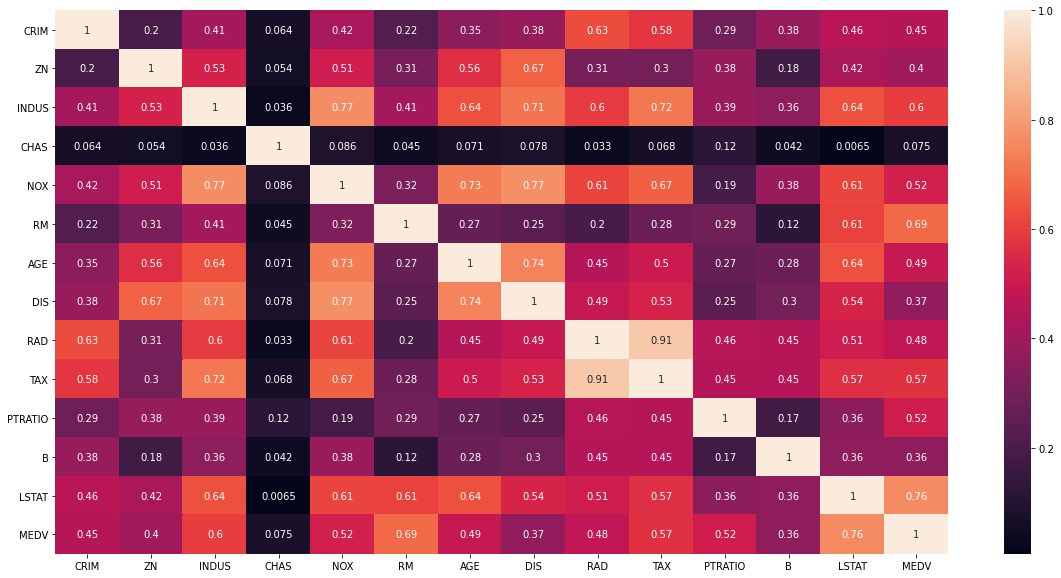

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

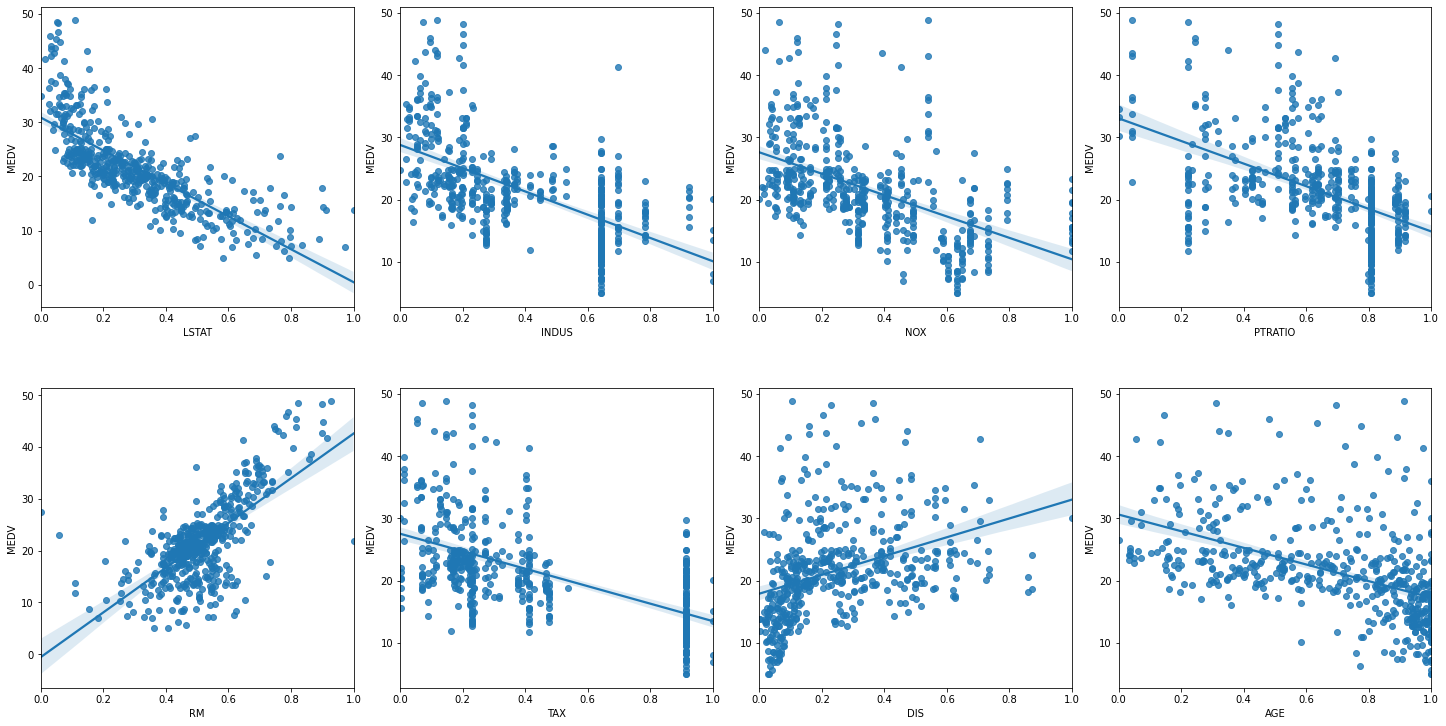

In [8]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [9]:
X_train = x.head(400)
Y_train = y.head(400)

X_test = x.tail(90)
Y_test = y.tail(90)

In [10]:
batch_size = 32
epochs = 800
inp_shape = X_train.shape[1]

In [11]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = model.fit(x, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

- val_loss: 16.3355 - val_mae: 3.3677 - val_mse: 16.3355
Epoch 683/800
14/14 [==============================] - 0s 4ms/step - loss: 15.0191 - mae: 2.8381 - mse: 15.0191 - val_loss: 16.1561 - val_mae: 3.3499 - val_mse: 16.1561
Epoch 684/800
14/14 [==============================] - 0s 4ms/step - loss: 15.0206 - mae: 2.8308 - mse: 15.0206 - val_loss: 16.3695 - val_mae: 3.3715 - val_mse: 16.3695
Epoch 685/800
14/14 [==============================] - 0s 4ms/step - loss: 15.0129 - mae: 2.8338 - mse: 15.0129 - val_loss: 15.9044 - val_mae: 3.3245 - val_mse: 15.9044
Epoch 686/800
14/14 [==============================] - 0s 4ms/step - loss: 15.0330 - mae: 2.8569 - mse: 15.0330 - val_loss: 15.5993 - val_mae: 3.2928 - val_mse: 15.5993
Epoch 687/800
14/14 [==============================] - 0s 5ms/step - loss: 15.0182 - mae: 2.8415 - mse: 15.0182 - val_loss: 16.5447 - val_mae: 3.3888 - val_mse: 16.5447
Epoch 688/800
14/14 [==============================] - 0s 4ms/step - loss: 15.0435 - mae: 2.8475 -

In [12]:
model.evaluate(X_test, Y_test)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


3/3 [==============================] - 0s 4ms/step - loss: 13.6682 - mae: 3.0116 - mse: 13.6682


In [24]:
prediction_results = model.predict(X_test)
prediction_results.shape

ValueError: in user code:

    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Thinkpad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 13 but received input with shape [None, 8]


(0.0, 100.0)

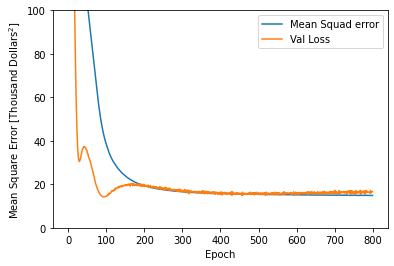

In [14]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [16]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

In [17]:
batch_size = 32
epochs = 800
inp_shape = train_features.shape[1]

In [18]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

In [19]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

val_mae: 2.1284 - val_mse: 6.6782
Epoch 680/800
12/12 [==============================] - 0s 4ms/step - loss: 7.1074 - mae: 1.8768 - mse: 7.1074 - val_loss: 6.8827 - val_mae: 2.1687 - val_mse: 6.8827
Epoch 681/800
12/12 [==============================] - 0s 6ms/step - loss: 7.1273 - mae: 1.8780 - mse: 7.1273 - val_loss: 6.9102 - val_mae: 2.1727 - val_mse: 6.9102
Epoch 682/800
12/12 [==============================] - 0s 6ms/step - loss: 7.0999 - mae: 1.8742 - mse: 7.0999 - val_loss: 6.6519 - val_mae: 2.1231 - val_mse: 6.6519
Epoch 683/800
12/12 [==============================] - 0s 6ms/step - loss: 7.0902 - mae: 1.8773 - mse: 7.0902 - val_loss: 6.6306 - val_mae: 2.1212 - val_mse: 6.6306
Epoch 684/800
12/12 [==============================] - 0s 6ms/step - loss: 7.0925 - mae: 1.8731 - mse: 7.0925 - val_loss: 6.7311 - val_mae: 2.1408 - val_mse: 6.7311
Epoch 685/800
12/12 [==============================] - 0s 7ms/step - loss: 7.0796 - mae: 1.8775 - mse: 7.0796 - val_loss: 6.6327 - val_mae: 2

In [33]:
model.evaluate(test_features, test_labels)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

4/4 [==============================] - 0s 3ms/step - loss: 935787.1875 - mae: 921.4608 - mse: 935787.1875


(0.0, 100.0)

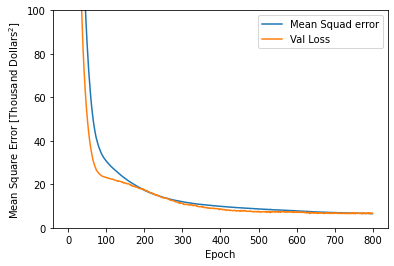

In [21]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.predict(test_features)

array([[1173.3134 ],
       [1008.78564],
       [ 812.72797],
       [1031.1249 ],
       [ 832.447  ],
       [ 896.3437 ],
       [ 738.54865],
       [ 744.2153 ],
       [ 759.74976],
       [1387.253  ],
       [ 834.5531 ],
       [ 870.7627 ],
       [1021.9004 ],
       [ 828.9423 ],
       [1449.5587 ],
       [ 763.2953 ],
       [ 836.1829 ],
       [ 863.5669 ],
       [1386.6547 ],
       [1434.3885 ],
       [1356.1837 ],
       [1172.712  ],
       [ 813.04663],
       [ 715.64514],
       [ 677.1173 ],
       [1379.102  ],
       [ 898.81995],
       [ 709.5415 ],
       [1259.8241 ],
       [ 807.64404],
       [ 995.6653 ],
       [1318.1006 ],
       [ 764.758  ],
       [ 813.6613 ],
       [1309.5472 ],
       [1242.6608 ],
       [ 899.2523 ],
       [ 882.20636],
       [1438.1836 ],
       [ 716.6879 ],
       [ 750.09686],
       [ 790.59216],
       [1411.5665 ],
       [ 881.2698 ],
       [ 852.03094],
       [ 753.7868 ],
       [ 753.3058 ],
       [ 826.

In [31]:
test_labels

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])